<a href="https://colab.research.google.com/github/MustafaBasit521/Customer_Segmentation/blob/main/Customer_Segmentation_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Customer Segmentation using **DBSCAN**

=> This project applies Unsupervised Learning techniques to cluster mall customers into meaningful segments based on their Annual Income and Spending Score.
=> In this project; I
(1)Applied DBSCAN for density-based clustering.
(2)DBSCAN is useful for finding irregular shapes in customer groups.

# **Importing The Libraries**

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans


# **Loading The Data**

In [3]:
#  data loading and creating
df=pd.read_csv("Mall_Customers.csv")

# **Data Cleaning and Preprocessing**

In [7]:
# Data cleaning and preprocessing

# dropping rows with NAN value
df.dropna(inplace=True)

# resetting index
df.reset_index(drop=True, inplace=True)

# ensuring the data is numeric
# filling the NAN data with mean of data
for col in ['Annual Income (k$)', 'Spending Score (1-100)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-850441547.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# **Selecting Features**


In [6]:
# Selecting features

X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling The **Data**

In [8]:
# scaling the data

scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# **Visualizing The Data**

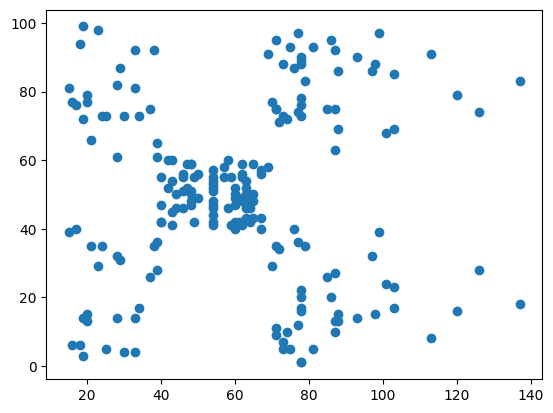

In [4]:
# visualizing the data points before clustering
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()


# **DBSCAN**

In [10]:
db=DBSCAN(eps=0.5,min_samples=5)
cluster=db.fit_predict(X_scaled)
print("Number of clusters found:", len(set(cluster)) - (1 if -1 in cluster else 0))


Number of clusters found: 2


# **Visualizing the Clusters**

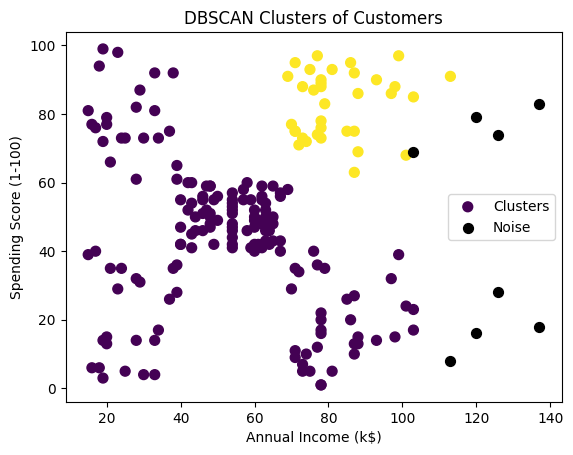

In [12]:
# visualizing

# Separate noise and clusters
# Plot clusters (labels >= 0)
plt.scatter(df.loc[df['Cluster'] >= 0, 'Annual Income (k$)'],
            df.loc[df['Cluster'] >= 0, 'Spending Score (1-100)'],
            c=df.loc[df['Cluster'] >= 0, 'Cluster'],
            cmap='viridis', s=50, label='Clusters')

# Plot noise (label = -1)
plt.scatter(df.loc[df['Cluster'] == -1, 'Annual Income (k$)'],
            df.loc[df['Cluster'] == -1, 'Spending Score (1-100)'],
            c='black', s=50, label='Noise')

plt.title('DBSCAN Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
